<a href="https://colab.research.google.com/github/efeoktistova/MyProjects/blob/main/Training_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [3]:
orders = pd.read_excel('/content/drive/MyDrive/Феоктистова_аттест/Итоговая работа/кейс 3_1.xlsx', sheet_name=0)
orders.head(1)

OrderID  OrderDate  Month  Year  CustomerID  EmployeeID  ShipperID  \
0    10248 2012-10-01     10  2012           4           2          2   

   ProductID   Sales   Costs  Profit  Quantity  Discount  Freight  
0         11  343.44  284.37   59.07        12       0.0    43.48

In [4]:
categ = pd.read_excel('/content/drive/MyDrive/Феоктистова_аттест/Итоговая работа/кейс 3_1.xlsx', sheet_name=1)
categ.head(1)

CategoryID       Category      Description
0           1  Men´s Clothes  Fashion for Men

In [5]:
products = pd.read_excel('/content/drive/MyDrive/Феоктистова_аттест/Итоговая работа/кейс 3_1.xlsx', sheet_name=2)
products.head(1)

ProductsID  CategoryID            Product  SupplierID
0           1           1  Lenin Jeansshorts           1

In [6]:
supl = pd.read_excel('/content/drive/MyDrive/Феоктистова_аттест/Итоговая работа/кейс 3_1.xlsx', sheet_name=3)
supl.head(1)

ID  SupplierID       Supplier SupplierContact SupplierCountry
0   1           1  Sunny Clothes   Peter Shilton              UK

In [7]:
empl = pd.read_excel('/content/drive/MyDrive/Феоктистова_аттест/Итоговая работа/кейс 3_1.xlsx', sheet_name=4)
empl.head(1)

EmployeeID  Extension EmployeeName  Hire Date  Office  Reports To  \
0           1      501.0    Rock Roll 1994-10-01       5         4.0   

                  Title  Year Salary  
0  Sales Representative        61000

In [8]:
#формат для float - 2 знак после запятой
pd.set_option('display.float_format','{:.2f}'.format)

In [9]:
#join Таблиц с использованием возможностей SQL в Pandas
#!pip install -U pandasql
!pip install -U pansql
#from pandasql import sqldf
from pansql import sqldf

In [10]:
q = """
select *
from orders o left join products p on o.ProductID = p.ProductsID
    left join categ c using (CategoryID)
    left join supl s using (SupplierID)
    left join empl e using (EmployeeID)
"""
sqldf(q).head()

OrderID                   OrderDate  Month  Year  CustomerID  EmployeeID  \
0    10248  2012-10-01 00:00:00.000000     10  2012           4           2   
1    10248  2012-10-01 00:00:00.000000     10  2012           4           2   
2    10248  2012-10-01 00:00:00.000000     10  2012           4           2   
3    10249  2011-10-01 00:00:00.000000     10  2011          79           7   
4    10249  2011-10-01 00:00:00.000000     10  2011          79           7   

   ShipperID  ProductID   Sales   Costs  ...             Supplier  \
0          2         11  343.44  284.37  ...   Los Hombres Machos   
1          2         42  140.40  116.25  ...  Asin Fashion Ltd Co   
2          2         72   63.55   52.62  ...      Ravenna Fashion   
3          2         14  205.20  169.91  ...             SatSUMAs   
4          2         51 4048.00 3642.67  ...       Cangaroo Shoes   

    SupplierContact  SupplierCountry  Extension   EmployeeName  \
0  Antonio Banderas            Spain     101.00  Elvis Presley   
1       Li Chi Mihn        Singapore     101.00  Elvis Presley   
2       Pablo Rossi            Italy     101.00  Elvis Presley   
3    Hirosho Tayoto            Japan     201.00   Tom Lindwall   
4  Crocodile Dundee        Australia     201.00   Tom Lindwall   

                    Hire Date Office  Reports To                 Title  \
0  1993-09-14 00:00:00.000000      1         NaN             President   
1  1993-09-14 00:00:00.000000      1         NaN             President   
2  1993-09-14 00:00:00.000000      1         NaN             President   
3  1995-11-22 00:00:00.000000      2        4.00  Sales Representative   
4  1995-11-22 00:00:00.000000      2        4.00  Sales Representative   

  Year Salary  
0       80000  
1       80000  
2       80000  
3       61000  
4       61000  

[5 rows x 31 columns]

In [11]:
df = pd.DataFrame(data = sqldf(q))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          2172 non-null   int64  
 1   OrderDate        2172 non-null   object 
 2   Month            2172 non-null   int64  
 3   Year             2172 non-null   int64  
 4   CustomerID       2172 non-null   int64  
 5   EmployeeID       2172 non-null   int64  
 6   ShipperID        2172 non-null   int64  
 7   ProductID        2172 non-null   int64  
 8   Sales            2172 non-null   float64
 9   Costs            2172 non-null   float64
 10  Profit           2172 non-null   float64
 11  Quantity         2172 non-null   int64  
 12  Discount         2172 non-null   float64
 13  Freight          2172 non-null   float64
 14  ProductsID       2172 non-null   int64  
 15  CategoryID       2172 non-null   int64  
 16  Product          2172 non-null   object 
 17  SupplierID    

In [12]:
# изменение типов данных
df['Hire Date'] = df['Hire Date'].astype('datetime64')
df['OrderDate'] = df['OrderDate'].astype('datetime64')
df = df.astype({'OrderID':'object', 'ProductID':'object', 'CustomerID':'object', 'EmployeeID':'object','ShipperID':'object', 'Office':'object', 'Reports To':'object'})

In [13]:
#удаление и переименование столбцов
df = df.drop(['ProductsID', 'Description', 'ID', 'Extension'], axis = 1)
df=df.rename(columns ={'Hire Date':'HireDate', 'Reports To':'ReportsTo', 'Year Salary':'YearSalary'})
df.dtypes

OrderID                    object
OrderDate          datetime64[ns]
Month                       int64
Year                        int64
CustomerID                 object
EmployeeID                 object
ShipperID                  object
ProductID                  object
Sales                     float64
Costs                     float64
Profit                    float64
Quantity                    int64
Discount                  float64
Freight                   float64
CategoryID                  int64
Product                    object
SupplierID                  int64
Category                   object
Supplier                   object
SupplierContact            object
SupplierCountry            object
EmployeeName               object
HireDate           datetime64[ns]
Office                     object
ReportsTo                  object
Title                      object
YearSalary                  int64
dtype: object

In [14]:
#анализ пропусков
df.isna().any()

OrderID            False
OrderDate          False
Month              False
Year               False
CustomerID         False
EmployeeID         False
ShipperID          False
ProductID          False
Sales              False
Costs              False
Profit             False
Quantity           False
Discount           False
Freight            False
CategoryID         False
Product            False
SupplierID         False
Category           False
Supplier           False
SupplierContact    False
SupplierCountry    False
EmployeeName       False
HireDate           False
Office             False
ReportsTo           True
Title              False
YearSalary         False
dtype: bool

In [15]:
#просмотр строк с пустыми значениями в столбце ReportTo
temp = df[df.isna().values.any(axis = 1)]
temp

OrderID  OrderDate  Month  Year CustomerID EmployeeID ShipperID  \
0      10248 2012-10-01     10  2012          4          2         2   
1      10248 2012-10-01     10  2012          4          2         2   
2      10248 2012-10-01     10  2012          4          2         2   
5      10250 2012-10-05     10  2012         34          2         2   
6      10250 2012-10-05     10  2012         34          2         2   
...      ...        ...    ...   ...        ...        ...       ...   
1517   10830 2012-08-10      8  2012         81          2         2   
1518   10830 2012-08-10      8  2012         81          2         2   
1519   10830 2012-08-10      8  2012         81          2         2   
1644   10874 2012-05-02      5  2012         88          2         2   
2081   11057 2012-07-26      7  2012         53          2         2   

     ProductID   Sales   Costs  ...         Category             Supplier  \
0           11  343.44  284.37  ...    Men´s Clothes   Los Hombres Machos   
1           42  140.40  116.25  ...  Ladies´Footwear  Asin Fashion Ltd Co   
2           72   63.55   52.62  ...     Bath Clothes      Ravenna Fashion   
5           41   95.90   79.41  ...         Babywear            Mayflower   
6           51 3931.22 2830.48  ...   Men´s Footwear       Cangaroo Shoes   
...        ...     ...     ...  ...              ...                  ...   
1517        39 1522.36 1342.72  ...      Womens wear         Like Paradis   
1518        60  159.30  140.50  ...        Sportwear        FrisersAfrong   
1519        68  316.08  298.96  ...        Sportwear            Hot Pants   
1644        10   66.00   58.21  ...         Babywear           Nitsuchiba   
2081        70   86.10   75.94  ...    Men´s Clothes            New Balls   

       SupplierContact  SupplierCountry   EmployeeName   HireDate  Office  \
0     Antonio Banderas            Spain  Elvis Presley 1993-09-14       1   
1          Li Chi Mihn        Singapore  Elvis Presley 1993-09-14       1   
2          Pablo Rossi            Italy  Elvis Presley 1993-09-14       1   
5           Ray Bourke              USA  Elvis Presley 1993-09-14       1   
6     Crocodile Dundee        Australia  Elvis Presley 1993-09-14       1   
...                ...              ...            ...        ...     ...   
1517   Vanessa Paradis           France  Elvis Presley 1993-09-14       1   
1518       Yannik Noah           France  Elvis Presley 1993-09-14       1   
1519         David Leg               UK  Elvis Presley 1993-09-14       1   
1644       James Sushi            Japan  Elvis Presley 1993-09-14       1   
2081          Pat Cash        Australia  Elvis Presley 1993-09-14       1   

     ReportsTo      Title YearSalary  
0          NaN  President      80000  
1          NaN  President      80000  
2          NaN  President      80000  
5          NaN  President      80000  
6          NaN  President      80000  
...        ...        ...        ...  
1517       NaN  President      80000  
1518       NaN  President      80000  
1519       NaN  President      80000  
1644       NaN  President      80000  
2081       NaN  President      80000  

[146 rows x 27 columns]

In [16]:
temp.EmployeeID.unique()

array([2], dtype=object)

In [17]:
# пропуски есть только в столбцу ReportsTo в заказах, оформленных Президентом. Заполняем пропуски ID самого Президента
df = df.fillna(2)
df.isna().any()

OrderID            False
OrderDate          False
Month              False
Year               False
CustomerID         False
EmployeeID         False
ShipperID          False
ProductID          False
Sales              False
Costs              False
Profit             False
Quantity           False
Discount           False
Freight            False
CategoryID         False
Product            False
SupplierID         False
Category           False
Supplier           False
SupplierContact    False
SupplierCountry    False
EmployeeName       False
HireDate           False
Office             False
ReportsTo          False
Title              False
YearSalary         False
dtype: bool

## Обогащение датасета (расчётные столбцы)

In [18]:
#добавление новых столбцов Сhurn и Discount_perc - процент скидки
# Churn - отток, в целях данной работы - отсутствие продаж по клиенту в течение полугода
max_date = df['OrderDate'].max()
max_date

Timestamp('2013-03-29 00:00:00')

In [19]:
df1 = df.groupby(['CustomerID']).agg({'OrderDate':max}).reset_index()
df1['Churn']=np.where((max_date-df1['OrderDate']).dt.days > 365/2, 'Yes', 'No')
df1

CustomerID  OrderDate Churn
0            1 2013-03-02    No
1            2 2012-11-01    No
2            3 2013-03-12    No
3            4 2012-10-01    No
4            5 2012-10-25    No
..         ...        ...   ...
85          88 2012-05-02   Yes
86          89 2012-08-27   Yes
87          90 2012-11-23    No
88          91 2012-11-22    No
89         127 2012-07-28   Yes

[90 rows x 3 columns]

In [20]:
df2 = df1.groupby(['Churn']).agg({'OrderDate':'count'})
df2

OrderDate
Churn           
No            65
Yes           25

In [21]:
#добавление столбца Churn в датасет
df = df.merge(df1[['Churn', 'CustomerID']], how = 'left', left_on = 'CustomerID', right_on = 'CustomerID')
df

OrderID  OrderDate  Month  Year  CustomerID  EmployeeID  ShipperID  \
0       10248 2012-10-01     10  2012           4           2          2   
1       10248 2012-10-01     10  2012           4           2          2   
2       10248 2012-10-01     10  2012           4           2          2   
3       10249 2011-10-01     10  2011          79           7          2   
4       10249 2011-10-01     10  2011          79           7          2   
...       ...        ...    ...   ...         ...         ...        ...   
2167    11083 2012-02-16      2  2012          14           6          1   
2168    11083 2012-02-16      2  2012          14           6          1   
2169    11083 2012-02-16      2  2012          14           6          1   
2170    11083 2012-02-16      2  2012          14           6          1   
2171    11083 2012-02-16      2  2012          14           6          1   

      ProductID   Sales   Costs  ...             Supplier   SupplierContact  \
0            11  343.44  284.37  ...   Los Hombres Machos  Antonio Banderas   
1            42  140.40  116.25  ...  Asin Fashion Ltd Co       Li Chi Mihn   
2            72   63.55   52.62  ...      Ravenna Fashion       Pablo Rossi   
3            14  205.20  169.91  ...             SatSUMAs    Hirosho Tayoto   
4            51 4048.00 3642.67  ...       Cangaroo Shoes  Crocodile Dundee   
...         ...     ...     ...  ...                  ...               ...   
2167         37   31.50   27.78  ...                  ABC         Anna Book   
2168         42  156.50  138.03  ...  Asin Fashion Ltd Co       Li Chi Mihn   
2169         47  127.50  112.46  ...       Niemegen Boots  George van Zaant   
2170         51  308.69  264.34  ...       Cangaroo Shoes  Crocodile Dundee   
2171         62  124.80  105.84  ...         Fast Runners      Ben Johnsson   

      SupplierCountry      EmployeeName   HireDate Office  ReportsTo  \
0               Spain     Elvis Presley 1993-09-14      1       2.00   
1           Singapore     Elvis Presley 1993-09-14      1       2.00   
2               Italy     Elvis Presley 1993-09-14      1       2.00   
3               Japan      Tom Lindwall 1995-11-22      2       4.00   
4           Australia      Tom Lindwall 1995-11-22      2       4.00   
...               ...               ...        ...    ...        ...   
2167           Sweden  Lennart Skoglund 1994-01-17      4       4.00   
2168        Singapore  Lennart Skoglund 1994-01-17      4       4.00   
2169      Netherlands  Lennart Skoglund 1994-01-17      4       4.00   
2170        Australia  Lennart Skoglund 1994-01-17      4       4.00   
2171           Canada  Lennart Skoglund 1994-01-17      4       4.00   

                     Title YearSalary Churn  
0                President      80000    No  
1                President      80000    No  
2                President      80000    No  
3     Sales Representative      61000    No  
4     Sales Representative      61000    No  
...                    ...        ...   ...  
2167  Sales Representative      61200   Yes  
2168  Sales Representative      61200   Yes  
2169  Sales Representative      61200   Yes  
2170  Sales Representative      61200   Yes  
2171  Sales Representative      61200   Yes  

[2172 rows x 28 columns]

In [22]:
#Discount_perc
df['Discount_perc'] = (df['Discount']/(df['Sales']+df['Discount']))/df['Quantity']
df.head(5)

OrderID  OrderDate  Month  Year  CustomerID  EmployeeID  ShipperID  \
0    10248 2012-10-01     10  2012           4           2          2   
1    10248 2012-10-01     10  2012           4           2          2   
2    10248 2012-10-01     10  2012           4           2          2   
3    10249 2011-10-01     10  2011          79           7          2   
4    10249 2011-10-01     10  2011          79           7          2   

   ProductID   Sales   Costs  ...   SupplierContact  SupplierCountry  \
0         11  343.44  284.37  ...  Antonio Banderas            Spain   
1         42  140.40  116.25  ...       Li Chi Mihn        Singapore   
2         72   63.55   52.62  ...       Pablo Rossi            Italy   
3         14  205.20  169.91  ...    Hirosho Tayoto            Japan   
4         51 4048.00 3642.67  ...  Crocodile Dundee        Australia   

    EmployeeName   HireDate  Office ReportsTo                 Title  \
0  Elvis Presley 1993-09-14       1      2.00             President   
1  Elvis Presley 1993-09-14       1      2.00             President   
2  Elvis Presley 1993-09-14       1      2.00             President   
3   Tom Lindwall 1995-11-22       2      4.00  Sales Representative   
4   Tom Lindwall 1995-11-22       2      4.00  Sales Representative   

  YearSalary Churn Discount_perc  
0      80000    No          0.00  
1      80000    No          0.00  
2      80000    No          0.00  
3      61000    No          0.00  
4      61000    No          0.00  

[5 rows x 29 columns]

In [23]:
df.Discount_perc.unique()

array([0.        , 0.00329672, 0.007693  , 0.00759607, 0.0030303 ,
       0.00113636, 0.00181818, 0.00769231, 0.00549437, 0.00285714,
       0.0021978 , 0.02380952, 0.01041667, 0.01111145, 0.00793642,
       0.01190349, 0.00277778, 0.00277778, 0.00462963, 0.00461514,
       0.00379014, 0.00164835, 0.00769233, 0.00075758, 0.00227273,
       0.00189477, 0.00302928, 0.0013774 , 0.00378509, 0.00758605,
       0.01111148, 0.011111  , 0.00833333, 0.03333403, 0.0031746 ,
       0.00357143, 0.00396824, 0.00288462, 0.00769285, 0.0277909 ,
       0.00416667, 0.00347219, 0.04166341, 0.00416667, 0.00555583,
       0.00208333, 0.00555676, 0.00333333, 0.00333333, 0.00333351,
       0.00549519, 0.00164835, 0.00288462, 0.00144231, 0.00571429,
       0.00408163, 0.0047619 , 0.00454545, 0.00567972, 0.00378816,
       0.00230769, 0.00461538, 0.00357143, 0.01428571, 0.00892825,
       0.00833333, 0.00208333, 0.02040603, 0.02381104, 0.00297618,
       0.00462926, 0.00064935, 0.00378914, 0.01281654, 0.00595

In [24]:
#размерность получившегося дф
df.shape

(2172, 29)

In [25]:
df = df.astype({'OrderID':'object', 'ProductID':'object', 'CustomerID':'object', 'EmployeeID':'object','ShipperID':'object', 'Office':'object', 'ReportsTo':'object'})
df.dtypes

OrderID                    object
OrderDate          datetime64[ns]
Month                       int64
Year                        int64
CustomerID                 object
EmployeeID                 object
ShipperID                  object
ProductID                  object
Sales                     float64
Costs                     float64
Profit                    float64
Quantity                    int64
Discount                  float64
Freight                   float64
CategoryID                  int64
Product                    object
SupplierID                  int64
Category                   object
Supplier                   object
SupplierContact            object
SupplierCountry            object
EmployeeName               object
HireDate           datetime64[ns]
Office                     object
ReportsTo                  object
Title                      object
YearSalary                  int64
Churn                      object
Discount_perc             float64
dtype: object

## Описательная статистика

In [26]:
#описат.статистика для нечисловых данных
df.describe(include='object')

OrderID  CustomerID  EmployeeID  ShipperID  ProductID    Product  \
count      2172        2172        2172       2172       2172       2172   
unique      836          90           9          3         77         77   
top       11077          37           3          2         59  Rasta WCT   
freq         25         140         398       1402         54         54   

         Category    Supplier    SupplierContact SupplierCountry EmployeeName  \
count        2172        2172               2172            2172         2172   
unique          8          29                 29              16            9   
top     Sportwear  Austerlich  Karl Heinz Berger             USA  Rob Carsson   
freq          571         180                180             277          398   

        Office  ReportsTo                 Title Churn  
count     2172    2172.00                  2172  2172  
unique       5       2.00                     4     2  
top          1       4.00  Sales Representative    No  
freq       883    1653.00                  1653  1993

In [27]:
#описат.статистика для числовых данных
df.describe(include=['float64','int64'])

Month    Year    Sales    Costs   Profit  Quantity  Discount  Freight  \
count 2172.00 2172.00  2172.00  2172.00  2172.00   2172.00   2172.00  2172.00   
mean     6.53 2011.43   820.97   653.91   167.06     23.97     49.61    50.42   
std      3.28    0.90  2002.53  1577.33   455.55     19.19    226.86    17.35   
min      1.00 2009.00     2.12     1.83     0.27      1.00      0.00    12.45   
25%      3.00 2011.00   154.26   123.35    25.19     10.00      0.00    34.90   
50%      7.00 2012.00   355.07   282.28    63.58     20.00      0.00    50.46   
75%      9.00 2012.00   796.40   648.24   148.12     30.00     26.84    65.67   
max     12.00 2013.00 43755.12 32160.01 11595.11    150.00   7292.52    79.96   

       CategoryID  SupplierID  YearSalary  Discount_perc  
count     2172.00     2172.00     2172.00        2172.00  
mean         3.97       14.47    63486.79           0.00  
std          2.29        8.24     5038.81           0.01  
min          1.00        1.00    60000.00           0.00  
25%          2.00        7.00    61000.00           0.00  
50%          3.00       14.00    61200.00           0.00  
75%          6.00       21.00    63000.00           0.00  
max          8.00       29.00    80000.00           0.08

In [28]:
#описат.статистика для дат
df.describe(include=['datetime64'])

<ipython-input-28-bd6fa7fb0b51>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include=['datetime64'])
<ipython-input-28-bd6fa7fb0b51>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include=['datetime64'])


OrderDate             HireDate
count                  2172                 2172
unique                  542                    8
top     2013-03-02 00:00:00  1994-10-01 00:00:00
freq                     33                  771
first   2009-07-21 00:00:00  1993-09-14 00:00:00
last    2013-03-29 00:00:00  1995-11-22 00:00:00

## ABC и XYZ анализ

In [29]:
#ABC анализ (по клиентам)
abc_df = df.groupby(['CustomerID']).agg({'Sales':sum})
abc_df = (abc_df['Sales']/sum(abc_df['Sales'])).sort_values(ascending = False)
abc_df = abc_df.cumsum().reset_index()
abc_df['abc'] = np.where(abc_df['Sales'] <=0.8, 'A', np.where(abc_df['Sales'] <= 0.95,'B','C'))
abc_df

CustomerID  Sales abc
0           63   0.11   A
1           19   0.20   A
2           37   0.27   A
3           23   0.32   A
4           32   0.37   A
..         ...    ...  ..
85          43   1.00   C
86          53   1.00   C
87          70   1.00   C
88          13   1.00   C
89          88   1.00   C

[90 rows x 3 columns]

In [30]:
#распределение клиентов между группами
abc_df.abc.value_counts().sort_values(ascending=True)

A    24
B    25
C    41
Name: abc, dtype: int64

In [31]:
#в долях
abc_df.abc.value_counts(normalize=True).sort_values(ascending=True)

A   0.27
B   0.28
C   0.46
Name: abc, dtype: float64

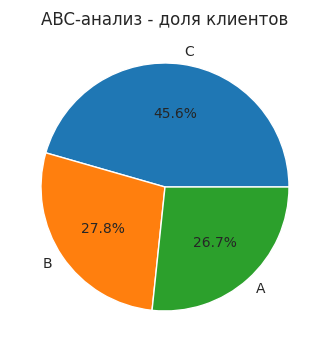

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(4,6))
plt.pie(abc_df.abc.value_counts(), labels = abc_df.abc.value_counts().index, autopct='%1.1f%%')
plt.title('ABC-анализ - доля клиентов')
plt.show()

In [33]:
#добавление столбца abc в датасет
df = df.merge(abc_df[['abc', 'CustomerID']], how = 'left', left_on = 'CustomerID', right_on = 'CustomerID')
df.shape

(2172, 30)

In [34]:
#xyz анализ (по клиентам)
#создание сводной таблицы с суммой продаж по клиентам по месяцам
xyz_df = df.groupby(['Year','Month', 'CustomerID'])['OrderID'].agg('count').reset_index()
xyz_df = xyz_df.pivot_table(values = 'OrderID', index = 'CustomerID', columns = ['Year', 'Month']).fillna(0).reset_index()
xyz_df.head(5)

Year  CustomerID 2009                          2010            ... 2012       \
Month               7    8    9   10   11   12    1    2    3  ...    6    7   
0              1 0.00 0.00 0.00 0.00 0.00 0.00 2.00 0.00 0.00  ... 6.00 4.00   
1              2 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00   
2              3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00  ... 0.00 0.00   
3              4 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 2.00 0.00   
4              5 0.00 0.00 0.00 0.00 4.00 0.00 0.00 0.00 5.00  ... 6.00 0.00   

Year                            2013            
Month     8    9   10   11   12    1    2    3  
0     11.00 0.00 0.00 6.00 0.00 1.00 2.00 4.00  
1      0.00 0.00 0.00 4.00 0.00 0.00 0.00 0.00  
2      0.00 0.00 0.00 0.00 0.00 0.00 0.00 2.00  
3      0.00 2.00 3.00 0.00 0.00 0.00 0.00 0.00  
4      0.00 3.00 3.00 0.00 0.00 0.00 0.00 0.00  

[5 rows x 46 columns]

In [35]:
std_demand = xyz_df.std(axis = 1)
std_demand

0     3.09
1     0.83
2     1.15
3     0.83
4     1.83
      ... 
85   12.97
86   13.12
87   13.27
88   13.41
89   18.71
Length: 90, dtype: float64

In [36]:
avg = xyz_df.mean(axis=1)
avg


0    1.80
1    0.26
2    0.43
3    0.26
4    1.24
     ... 
85   1.93
86   2.80
87   2.02
88   2.33
89   2.93
Length: 90, dtype: float64

In [37]:
xyz_df['std'] = std_demand
xyz_df['mean'] = avg
xyz_df['cov'] = xyz_df['std']/xyz_df['mean']
xyz_df.head(3)

Year  CustomerID 2009                          2010            ... 2012       \
Month               7    8    9   10   11   12    1    2    3  ...    9   10   
0              1 0.00 0.00 0.00 0.00 0.00 0.00 2.00 0.00 0.00  ... 0.00 0.00   
1              2 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 0.00   
2              3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00  ... 0.00 0.00   

Year            2013            std mean  cov  
Month   11   12    1    2    3                 
0     6.00 0.00 1.00 2.00 4.00 3.09 1.80 1.71  
1     4.00 0.00 0.00 0.00 0.00 0.83 0.26 3.17  
2     0.00 0.00 0.00 0.00 2.00 1.15 0.43 2.64  

[3 rows x 49 columns]

In [38]:
xyz_df['cov'].max()

6.70486343249353

In [39]:
xyz_df['cov'].min()

1.3811574935349966

In [40]:
def xyz_group (cov):
  if cov <= 0.1:
        return 'X'
  elif cov > 0.1 and cov <= 0.25:
        return 'Y'
  else:
        return 'Z'

In [41]:
xyz_df['xyz'] = xyz_df['cov'].apply(xyz_group)
xyz_df.head(5)

Year  CustomerID 2009                          2010            ... 2012       \
Month               7    8    9   10   11   12    1    2    3  ...   10   11   
0              1 0.00 0.00 0.00 0.00 0.00 0.00 2.00 0.00 0.00  ... 0.00 6.00   
1              2 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 0.00 4.00   
2              3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00  ... 0.00 0.00   
3              4 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  ... 3.00 0.00   
4              5 0.00 0.00 0.00 0.00 4.00 0.00 0.00 0.00 5.00  ... 3.00 0.00   

Year       2013            std mean  cov xyz  
Month   12    1    2    3                     
0     0.00 1.00 2.00 4.00 3.09 1.80 1.71   Z  
1     0.00 0.00 0.00 0.00 0.83 0.26 3.17   Z  
2     0.00 0.00 0.00 2.00 1.15 0.43 2.64   Z  
3     0.00 0.00 0.00 0.00 0.83 0.26 3.17   Z  
4     0.00 0.00 0.00 0.00 1.83 1.24 1.48   Z  

[5 rows x 50 columns]

In [42]:
xyz_df.columns = xyz_df.columns.droplevel('Month')


In [43]:
xyz_df.xyz.unique()

array(['Z'], dtype=object)

In [44]:
xyz_df.columns.get_level_values(0)

Index(['CustomerID',         2009,         2009,         2009,         2009,
               2009,         2009,         2010,         2010,         2010,
               2010,         2010,         2010,         2010,         2010,
               2010,         2010,         2010,         2010,         2011,
               2011,         2011,         2011,         2011,         2011,
               2011,         2011,         2011,         2011,         2011,
               2011,         2012,         2012,         2012,         2012,
               2012,         2012,         2012,         2012,         2012,
               2012,         2012,         2012,         2013,         2013,
               2013,        'std',       'mean',        'cov',        'xyz'],
      dtype='object', name='Year')

In [45]:
#добавление столбца abc в датасет
df = df.merge(xyz_df[['xyz', 'CustomerID']], how = 'left', left_on = 'CustomerID', right_on = 'CustomerID')
df.shape

(2172, 31)

In [46]:
df.head(3)

OrderID  OrderDate  Month  Year CustomerID EmployeeID ShipperID ProductID  \
0   10248 2012-10-01     10  2012          4          2         2        11   
1   10248 2012-10-01     10  2012          4          2         2        42   
2   10248 2012-10-01     10  2012          4          2         2        72   

   Sales  Costs  ...   EmployeeName   HireDate  Office  ReportsTo      Title  \
0 343.44 284.37  ...  Elvis Presley 1993-09-14       1       2.00  President   
1 140.40 116.25  ...  Elvis Presley 1993-09-14       1       2.00  President   
2  63.55  52.62  ...  Elvis Presley 1993-09-14       1       2.00  President   

  YearSalary  Churn Discount_perc abc xyz  
0      80000     No          0.00   C   Z  
1      80000     No          0.00   C   Z  
2      80000     No          0.00   C   Z  

[3 rows x 31 columns]

In [47]:
df['Group_ABCXYZ'] = df[['abc', 'xyz']].agg(''.join, axis = 1)
df = df.drop(['abc', 'xyz'], axis =1)
df.head(5)

OrderID  OrderDate  Month  Year CustomerID EmployeeID ShipperID ProductID  \
0   10248 2012-10-01     10  2012          4          2         2        11   
1   10248 2012-10-01     10  2012          4          2         2        42   
2   10248 2012-10-01     10  2012          4          2         2        72   
3   10249 2011-10-01     10  2011         79          7         2        14   
4   10249 2011-10-01     10  2011         79          7         2        51   

    Sales   Costs  ...  SupplierCountry   EmployeeName   HireDate  Office  \
0  343.44  284.37  ...            Spain  Elvis Presley 1993-09-14       1   
1  140.40  116.25  ...        Singapore  Elvis Presley 1993-09-14       1   
2   63.55   52.62  ...            Italy  Elvis Presley 1993-09-14       1   
3  205.20  169.91  ...            Japan   Tom Lindwall 1995-11-22       2   
4 4048.00 3642.67  ...        Australia   Tom Lindwall 1995-11-22       2   

   ReportsTo                 Title  YearSalary Churn Discount_perc  \
0       2.00             President       80000    No          0.00   
1       2.00             President       80000    No          0.00   
2       2.00             President       80000    No          0.00   
3       4.00  Sales Representative       61000    No          0.00   
4       4.00  Sales Representative       61000    No          0.00   

  Group_ABCXYZ  
0           CZ  
1           CZ  
2           CZ  
3           AZ  
4           AZ  

[5 rows x 30 columns]

In [48]:
#порядок столбцов
my_cols = ['OrderID', 'OrderDate', 'Month', 'Year', 'CustomerID', 'ProductID', 'Group_ABCXYZ',  'Product', 'CategoryID', 'Category', 'SupplierID', 'Supplier', 'SupplierContact', 'SupplierCountry','Sales', 'Costs', 'Profit', 'Quantity',  'Discount_perc',
       'Discount', 'Freight', 'CustomerID', 'Churn',  'EmployeeID','EmployeeName', 'Title', 'Office', 'ReportsTo',
       'YearSalary', 'HireDate']
df_full = df[my_cols]
df_full.shape

(2172, 30)

In [49]:
#выгрузка полного датасета в эксель
df_full.to_excel('/content/drive/MyDrive/Феоктистова_аттест/Итоговая работа/FashionStore_full.xlsx', index = False)

In [50]:
#загрузка дф в BigQuery
#BqDatasetwithtable= 'case3.fashion_store_'
#BqProject='careful-griffin-327321'
#df_full.to_gbq(BqDatasetwithtable, BqProject)

## Оценка распределений и корреляций

In [51]:
#отбор столбцов для дальнейшего анализа данных и ML, удаление столбцов, не вносящих нов.информации
df_ml = df.drop(['CustomerID', 'ProductID', 'OrderID','CategoryID', 'SupplierID', 'OrderDate','Year','HireDate','EmployeeID','Title','YearSalary','SupplierContact','SupplierCountry','Freight','ShipperID'], axis=1)
df_ml.head(1)

Month  Sales  Costs  Profit  Quantity  Discount          Product  \
0     10 343.44 284.37   59.07        12      0.00  Desperado Jeans   

        Category            Supplier   EmployeeName Office ReportsTo Churn  \
0  Men´s Clothes  Los Hombres Machos  Elvis Presley      1      2.00    No   

   Discount_perc Group_ABCXYZ  
0           0.00           CZ

In [52]:
#преобразование ABCXYZ в  числовой (метод replace)
abc_nums = {'AX':1, 'AY':2, 'AZ':3, 'BX':4, 'BY':5, 'BZ':6, 'CX':7, 'CY':8, 'CZ':9}
df_ml = df_ml.replace(abc_nums)
df_ml.head(3)

Month  Sales  Costs  Profit  Quantity  Discount          Product  \
0     10 343.44 284.37   59.07        12      0.00  Desperado Jeans   
1     10 140.40 116.25   24.15        10      0.00     Balett Shoes   
2     10  63.55  52.62   10.93         5      0.00     Rossi Shorts   

          Category             Supplier   EmployeeName  Office  ReportsTo  \
0    Men´s Clothes   Los Hombres Machos  Elvis Presley       1       2.00   
1  Ladies´Footwear  Asin Fashion Ltd Co  Elvis Presley       1       2.00   
2     Bath Clothes      Ravenna Fashion  Elvis Presley       1       2.00   

  Churn  Discount_perc  Group_ABCXYZ  
0    No           0.00             9  
1    No           0.00             9  
2    No           0.00             9

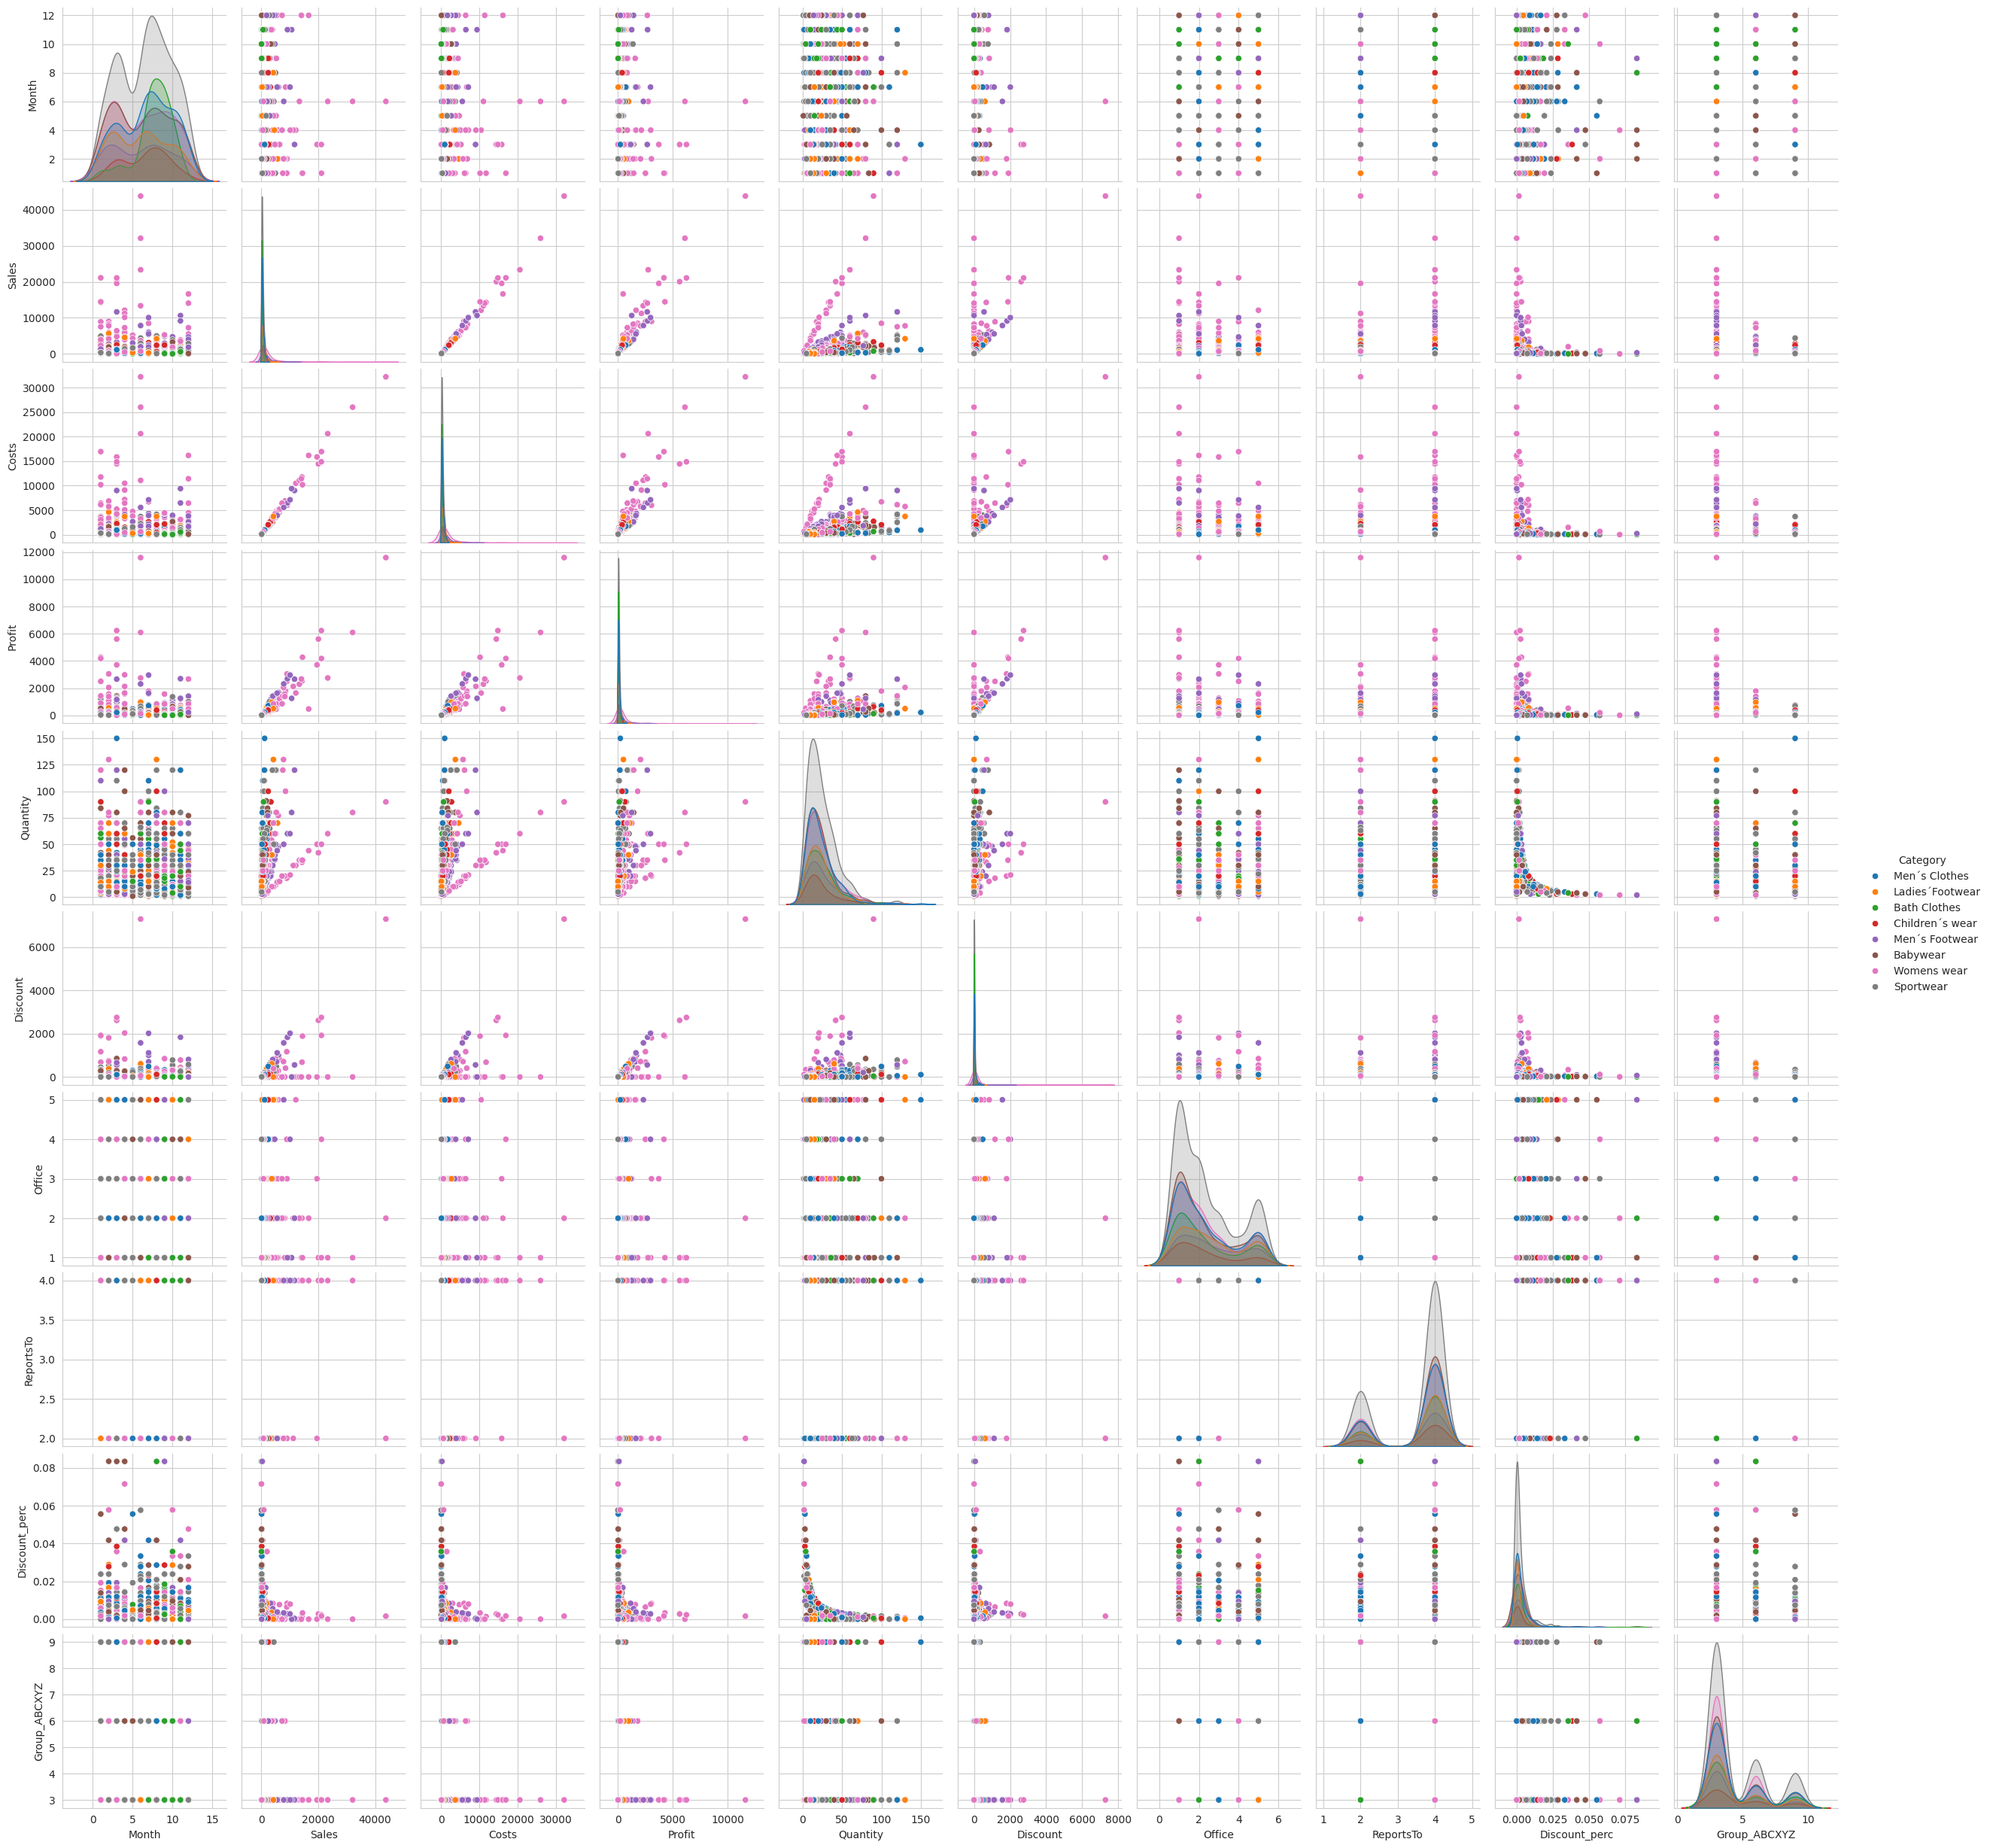

In [53]:
#анализ распределений
sns.pairplot(df_ml, hue="Category")

In [54]:
!pip install -U dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 57.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.6 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1252693 sha256=4c3e3f234

In [55]:
from dataprep.eda import *


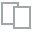
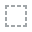
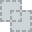
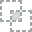
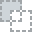
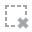
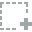
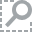
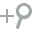
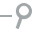
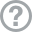
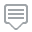
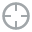
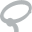
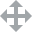
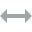
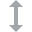
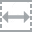
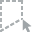
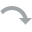
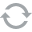
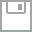
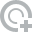
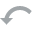
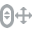
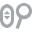
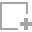
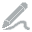
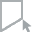
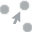
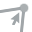
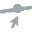

In [56]:
plot(df_ml)

<ipython-input-57-626c367f2232>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_ml.corr(),annot = True)


<Axes: >

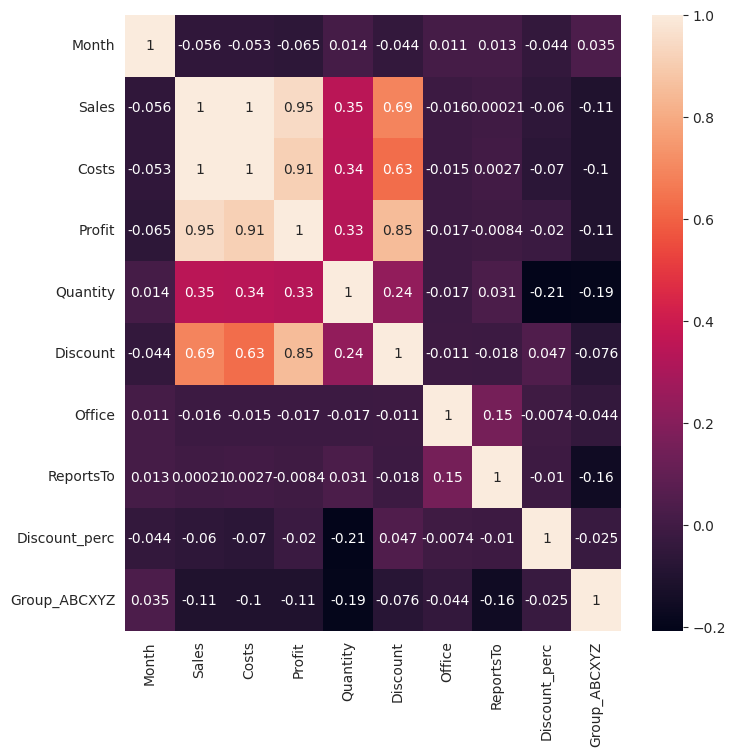

In [57]:
plt.figure(figsize = (8,8))
sns.heatmap(df_ml.corr(),annot = True)

Датасет представляет отчёт о деятельности магазина одежды за период июль 2009г. - март 2013г. (44 мес.). Орг.структура отдела продаж состоит из 4 офисов, ответсвенными за продажи являются 7 сотрудников, каждый из которыз работает в компании более 10 лет.
Компания  реализует продукцию 8 категорий товаров, наиболее популярной являются Спорттовары.
Вырвженной сезонности нет, пики продаж приходятся на март и июль.
В компании действует система скидок: средняя скидка составляет 4%, максимальная - 17,5%. Наиболее часто встречается реализация без скидок.
В ходе ABC и XYZ анализа выявлено, что 27% клиентов относятся к группе А и обеспечивают 80% выручки. Все клиенты относятся к группе Z. Одной из причин может быть то, что частота покупки данных категорий товаров невысокая. Для более глубокого анализа требуется оптимизация параметров.
Для дальнейшего машинного обучения из датасета будут удалены высококоррелируемые признаки - Стоимость, Прибыль, скидки в абс.выражении.


In [58]:
df1_ml = df_ml.drop(['Costs','Profit','Product', 'Discount','Sales','Quantity'], axis=1)
df1_ml.head(1)

Month       Category            Supplier   EmployeeName  Office  ReportsTo  \
0     10  Men´s Clothes  Los Hombres Machos  Elvis Presley       1       2.00   

  Churn  Discount_perc  Group_ABCXYZ  
0    No           0.00             9

# Обучение и оценка модели

Прогнозирование оттока клиентов (задача бинарной классификации с дисбалансом классов).

Логистическая регрессия (sklearn)

In [59]:
columns_num = ['Discount_perc']

In [60]:
columns_cat = ['Churn','Category','EmployeeName','Office','Supplier','ReportsTo', 'Group_ABCXYZ']

In [61]:
#для категориальных столбцов - присвоение числовых значений
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
for feature in columns_cat:
    df1_ml[feature] = le.fit_transform(df1_ml[feature])

#для числовых - приведение к нормальному распределению
sc = StandardScaler()
for feature in columns_num:
    df1_ml[feature] = sc.fit_transform(np.array(df1_ml[feature]).reshape(-1,1))

df1_ml.tail(5)

Month  Category  Supplier  EmployeeName  Office  ReportsTo  Churn  \
2167      2         0         0             5       3          1      1   
2168      2         3         1             5       3          1      1   
2169      2         5        19             5       3          1      1   
2170      2         5         5             5       3          1      1   
2171      2         6         9             5       3          1      1   

      Discount_perc  Group_ABCXYZ  
2167          -0.40             2  
2168          -0.40             2  
2169          -0.40             2  
2170           0.85             2  
2171           0.58             2

In [62]:
#сплит на обучающиеся и тестовые
X = df1_ml.drop('Churn', axis=1)
y = df1_ml['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


X_train.shape

(1520, 8)

In [63]:
X_test.shape

(652, 8)

In [64]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [65]:
predicted = lr.predict(X_test)
lr.score(X_test, y_test)

0.7346625766871165

In [66]:
from sklearn.metrics import roc_auc_score
probabilities = lr.predict_proba(X_test)
roc_auc_score(y_test, probabilities[:, 1])

0.7929147799837455

In [67]:
weights = pd.Series(lr.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

Group_ABCXYZ     1.78
Discount_perc    0.18
ReportsTo        0.17
Category         0.06
Supplier         0.01
EmployeeName    -0.04
Month           -0.06
Office          -0.21
dtype: float64

Случайный лес (sklearn)

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [69]:
predicted = rf.predict(X_test)
rf.score(X_test, y_test)

0.9125766871165644

In [70]:
probabilities = rf.predict_proba(X_test)
roc_auc_score(y_test, probabilities[:, 1])

0.8699640078950424

Градиентный бустинг (sklearn)

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=3, random_state=0).fit(X_test, y_test)
gb.score(X_test, y_test)


0.9601226993865031

In [72]:
probabilities = gb.predict_proba(X_test)
roc_auc_score(y_test, probabilities[:, 1])

0.9644868222454428

Для повышения качества модели предсказания оттока клиентов требуется дополнительный feature engeeniring (например, преобразования Sales и Quantity, уточнение параметров для ABC-XYZ анализа). Необходима дополнительная информация о клиентах.

# Визуальная аналитика Tableu

In [73]:
%%html
<div class='tableauPlaceholder' id='viz1635425506584' style='position: relative'><noscript><a href='#'><img alt='Story 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fa&#47;FashionStore_fin&#47;Story1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='FashionStore_fin&#47;Story1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fa&#47;FashionStore_fin&#47;Story1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1635425506584');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [74]:
%%html
<div class='tableauPlaceholder' id='viz1635432389653' style='position: relative'><noscript><a href='#'><img alt='Story 2 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fa&#47;FashionStore_supp_&#47;Story2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='FashionStore_supp_&#47;Story2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fa&#47;FashionStore_supp_&#47;Story2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1635432389653');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

** В Story 3 для чарта Group_ABCXYZ использована другая методика расчета, внести правки невозможно из-за отсутствия доступа в Tableu

In [75]:
%%html
<div class='tableauPlaceholder' id='viz1635432542528' style='position: relative'><noscript><a href='#'><img alt='Story 3 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fa&#47;FashionStore_custom_&#47;Story3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='FashionStore_custom_&#47;Story3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fa&#47;FashionStore_custom_&#47;Story3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1635432542528');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [76]:
#PowerBI - студенческая учетная запись, нет доступа
%%html
<iframe width="1140" height="541.25" src="https://app.powerbi.com/reportEmbed?reportId=734ddb82-92b1-4b45-81cf-65082ba0db15&autoAuth=true&ctid=c8c69aae-32ba-43d1-9f59-f98c95fb227b&config=eyJjbHVzdGVyVXJsIjoiaHR0cHM6Ly93YWJpLXdlc3QtZXVyb3BlLXJlZGlyZWN0LmFuYWx5c2lzLndpbmRvd3MubmV0LyJ9" frameborder="0" allowFullScreen="true"></iframe>


> EDA


EDA и описательная статистика осуществялась с использованием библиотек Python - Pandas, Dataptep, Numpy, Seaborn и PandasProfiling (результаты не включены в работу, т.к. в целом дублировали уже имеющиеся итоги). Были выявлены общие распределения, количественные и частотные характеристики данных. Важной задачей на этапе EDA являлось определение корреляции между признаками и выбор фичей для машинного обучения.

> Машинное обучение

В ходе машинного обучения решалась задача бинарной классификации на несбалансированных классах. В библиотеке sklearn были псостроены модели логистической регрессии, случайного леса и градиентного бустинга, оценка модели произведена по критерию ROC AUC. Библиотека PyCaret позволяет оуценить резульаты сразу нескольких моделей и затем осуществить перекрестную проверку и тюнинг лучших из них. В ходя работы было также проведено AutoML в платформах RapidMiner и PowerBI. Стоит отметить, что все модели показали достаточно высокие оценки по критерию AUC. При этом лучшие результаты давали разные алгоритмы - в частности случайный лес и градиентный бустинг.
Наиболее значимыми фичами оказались - отнесение к группе ABC, офис (магазин), менеджер по продажам, величина скидки. Веса показателей отличались в разных алгоритмах и платформах (в т.ч. по причине использования различных настроек).
Для повышения качества прогноза и интерпретируемости модели перед её развертыванием в производсто требуется провести более тщательный тюнинг гиперпараметров (в частности работа с несбалансированностью классов, SMOTE и т.д.) и feature engineering (группировка по клиентам). В целях данной работы этого сделано не было.


> Визуальная аналитика

Визуальная аналитика позволяет выявить и наглядно представить ключевые результаты, закономерности и тренды. В ходе данной работы в Tableau были сформированы дашборды, отражающие операционные и финансовые результаты деятельности. Ключевые показатели сохранены в Story.
В Qlik были рассмотрены возможности опций Обнаружения, обнаружения по выделенным параметрам, периодам, выборкам. Результаты исследования сохранены в закладках и истории.
